In [1]:
import os
import numpy as np
import pandas as pd

import pymatgen as pg


In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [3]:

def local_min(df):

    df['dy'] = df['Edis'].diff()

    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()

    # Indices of local maxima: derivative goes from negative (-1) to positive (+1)
    local_min_indices = df.index[(df['sign_change'] > 0)]

    local_mins = df.loc[local_min_indices, ['cell_length', 'Edis']].reset_index(drop=True)

    return local_mins

def local_max(df):
    df['dy'] = df['Edis'].diff()

    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()

    # Indices of local maxima: derivative goes from negative (-1) to positive (+1)
    local_min_indices = df.index[(df['sign_change'] < 0)]

    local_max = df.loc[local_min_indices, ['cell_length', 'Edis']].reset_index(drop=True)

    return local_max

In [4]:
def finding_diff(df):
    abs_max = df['Edis'].max()
    max_val = local_max(df)
    min_val = local_min(df)

    diff = (abs_max + max_val['Edis'][0])/2 - min_val['Edis'][0]

    return diff

In [5]:
from pymatgen.core import Structure

In [192]:
#list all folders inside li_d3s
li_d3s = os.listdir("li_d3s")

results = []

df = pd.DataFrame()
cnt=0
for items in li_d3s:
    cnt+=1
    #get the path of each folder
    path = os.path.join("li_d3s", items)
    # print(items)
    
    #ignore .DS_Store
    if items == ".DS_Store":
        continue
    file = os.path.join(path, f'{items}.csv')
    struct_file = os.path.join(path, 'POSCAR')
    df = pd.read_csv(file)
    print(f"Reading {file}")

    struct = Structure.from_file(struct_file)
    sites = struct.num_sites

    # print(struct.composition['Li'])
    li_sites = struct.composition['Li']
   
    diff_energy = finding_diff(df)
    print(f'Composition {struct.composition}')
    print(f'diff per toal sites {diff_energy/sites}')
    print(f'diff per Li sites {diff_energy/li_sites}')
    print('-----------------------------------')

    result = {
        "Symbol": struct.composition.elements[1],
        "Structure": struct.composition,
        "Total Sites": sites,
        "Li Sites": li_sites,
        "Diff Energy": diff_energy,
        "Diff per Total Sites": diff_energy/sites,
        "Diff per Li Sites": diff_energy/li_sites,
        "Composition": str(struct.composition)
    }

    results.append(result)
print(f'total structure analysed = {cnt}')
    

Reading li_d3s/LiGe_141/LiGe_141.csv
Composition Li6 Ge6
diff per toal sites 0.0013341615897780837
diff per Li sites 0.0026683231795561675
-----------------------------------
Reading li_d3s/LiMg_5/LiMg_5.csv
Composition Li3 Mg3
diff per toal sites 0.016657339849104266
diff per Li sites 0.03331467969820853
-----------------------------------
Reading li_d3s/LiB_227/LiB_227.csv
Composition Li2 B2
diff per toal sites 0.0010879295338342499
diff per Li sites 0.0021758590676684997
-----------------------------------
Reading li_d3s/LiSi_227/LiSi_227.csv
Composition Li2 Si2
diff per toal sites 0.001197946015120837
diff per Li sites 0.002395892030241674
-----------------------------------
Reading li_d3s/LiCl_225/LiCl_225.csv
Composition Li1 Cl1
diff per toal sites 0.00696345717606865
diff per Li sites 0.0139269143521373
-----------------------------------
Reading li_d3s/LiMn_187/LiMn_187.csv
Composition Li1 Mn1
diff per toal sites 0.0031490046097577247
diff per Li sites 0.0062980092195154495
---

### for individual elements

In [11]:

file = "../Li_bulk/Li_fcc/Li_fcc.csv"
struct_file = '../Li_bulk/Li_fcc/POSCAR'

df = pd.read_csv(file)
print(f"Reading {file}")
struct = Structure.from_file(struct_file)
sites = struct.num_sites
# print(struct.composition['Li'])
li_sites = struct.composition['Li']

diff_energy = finding_diff(df)
print(f'Composition {struct.composition}')
print(f'diff per toal sites {diff_energy/sites}')
print(f'diff per Li sites {diff_energy/li_sites}')
print('-----------------------------------')
result = {
    "Symbol": struct.composition.elements[0],
    "Structure": struct.composition,
    "Total Sites": sites,
    "Li Sites": li_sites,
    "Diff Energy": diff_energy,
    "Diff per Total Sites": diff_energy/sites,
    "Diff per Li Sites": diff_energy/li_sites,
    "Composition": str(struct.composition)
}

result

Reading ../Li_bulk/Li_fcc/Li_fcc.csv
Composition Li4
diff per toal sites 0.01958773970332975
diff per Li sites 0.01958773970332975
-----------------------------------


{'Symbol': Element Li,
 'Structure': Composition('Li4'),
 'Total Sites': 4,
 'Li Sites': 4.0,
 'Diff Energy': 0.078350958813319,
 'Diff per Total Sites': 0.01958773970332975,
 'Diff per Li Sites': 0.01958773970332975,
 'Composition': 'Li4'}

In [193]:
results_df = pd.DataFrame(results)
# results_df.to_csv("analysis_results.csv", index=False)

print(f"Total str.uctures analysed = {cnt}")
# print("Results saved to analysis_results.csv")

results_df

Total str.uctures analysed = 73


,Symbol,Structure,Total Sites,Li Sites,Diff Energy,Diff per Total Sites,Diff per Li Sites,Composition
0,Ge,"(Li, Ge)",12,6.0,0.016010,0.001334,0.002668,Li6 Ge6
1,Mg,"(Li, Mg)",6,3.0,0.099944,0.016657,0.033315,Li3 Mg3
2,B,"(Li, B)",4,2.0,0.004352,0.001088,0.002176,Li2 B2
3,Si,"(Li, Si)",4,2.0,0.004792,0.001198,0.002396,Li2 Si2
4,Cl,"(Li, Cl)",2,1.0,0.013927,0.006963,0.013927,Li1 Cl1
...,...,...,...,...,...,...,...,...
67,Sn,"(Li, Sn)",12,6.0,0.019686,0.001640,0.003281,Li6 Sn6
68,N,"(Li, N)",2,1.0,0.011450,0.005725,0.011450,Li1 N1
69,Ga,"(Li, Ga)",4,2.0,0.017350,0.004338,0.008675,Li2 Ga2
70,Br,"(Li, Br)",2,1.0,0.013457,0.006728,0.013457,Li1 Br1


### Thougest part is to make the Feature functions data 


In [194]:
props = pd.read_csv('PubChemElements_all.csv')
polarisability = pd.read_csv('elements_polarizability.csv')

props = props[['Symbol', 'AtomicMass','AtomicRadius','Electronegativity','IonizationEnergy','ElectronAffinity']]

In [195]:
all_props = []
cnt = 0
for items in li_d3s:
    # cnt+=1
    #get the path of each folder
    path = os.path.join("li_d3s", items)
    # print(items)
    
    #ignore .DS_Store
    if items == ".DS_Store":
        continue
    file = os.path.join(path, f'{items}.csv')
    struct_file = os.path.join(path, 'POSCAR')


    struct = Structure.from_file(struct_file)
    sites = struct.num_sites

    # print(struct.composition.elements[1])

    elem = struct.composition.elements[1]
    # print(elem.symbol == 'Ge')

    matched_row = props[props['Symbol'] == elem.symbol]
    elem_polarizability = polarisability[polarisability['Symbol'] == elem.symbol]
    
    print(results_df['Diff per Total Sites'][cnt])
    # DiffPerLi = results_df[results_df['Symbol'] == elem.symbol]
    # matched_row.add('Polarizability', elem_polarizability['Polarizability'].values[0])
    matched_row['Polarizability'] = elem_polarizability['Polarizability'].values[0]
    matched_row['results_per_total'] = results_df['Diff per Total Sites'][cnt]
    matched_row['results_per_li'] = results_df['Diff per Total Sites'][cnt]
    # matched_row['TotalSites'] = results_df['Total Sites'][cnt]
    matched_row['LiSites'] = results_df['Li Sites'][cnt]
    # matched_row['Diff per Li Sites'] = DiffPerLi['Diff per Li Sites'].values[0]
    all_props.append(matched_row)

    cnt+=1

all_props_df = pd.concat(all_props, ignore_index=True)
    

0.0013341615897780837
0.016657339849104266
0.0010879295338342499
0.001197946015120837
0.00696345717606865
0.0031490046097577247
0.012884955544424075
0.010878998451046082
0.006840046432642399
0.016591063253382887
0.008016642497761094
0.013504645385935585
0.003511203079494825
0.001558669472609042
0.00812876769215665
0.007698734912711974
0.0014141310225483004
0.004485602707869213
0.013250020619529563
0.01396158625127065
0.0161931413407314
0.015674694680557676
0.004735737422616224
0.0013657398914888748
0.010541760368954226
0.011225419546443625
0.007605116397794513
0.013023588366629526
0.0035080810988986503
0.0151909213083102
0.012928471613960098
0.015026043729961823
0.007770909813516099
0.014156426614533226
0.007113352203163776
0.012096499724428757
0.01062777362456355
0.009840965766717974
0.017147676384894922
0.005581935254870469
0.005702335187590274
0.01416389189832885
0.016477627548418
0.016699025016996823
0.003463775553977101
0.005074766563289631
0.0034036575752345254
0.0150747549601754

/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_25749/2593807019.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['Polarizability'] = elem_polarizability['Polarizability'].values[0]
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_25749/2593807019.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_row['results_per_total'] = results_df['Diff per Total Sites'][cnt]
/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_25749/2593807019.py:32: SettingWithCopyW

In [196]:
all_props_df


,Symbol,AtomicMass,AtomicRadius,Electronegativity,IonizationEnergy,ElectronAffinity,Polarizability,results_per_total,results_per_li,LiSites
0,Ge,72.630,211.0,2.01,7.900,1.350,40.0,0.001334,0.001334,6.0
1,Mg,24.305,173.0,1.31,7.646,NaN,71.2,0.016657,0.016657,3.0
2,B,10.810,192.0,2.04,8.298,0.277,20.5,0.001088,0.001088,2.0
3,Si,28.085,210.0,1.90,8.152,1.385,37.3,0.001198,0.001198,2.0
4,Cl,35.450,175.0,3.16,12.968,3.617,14.6,0.006963,0.006963,1.0
...,...,...,...,...,...,...,...,...,...,...
67,Sn,118.710,217.0,1.96,7.344,1.200,53.0,0.001640,0.001640,6.0
68,N,14.007,155.0,3.04,14.534,NaN,7.4,0.005725,0.005725,1.0
69,Ga,69.723,187.0,1.81,5.999,0.300,50.0,0.004338,0.004338,2.0
70,Br,79.900,183.0,2.96,11.814,3.365,21.0,0.006728,0.006728,1.0


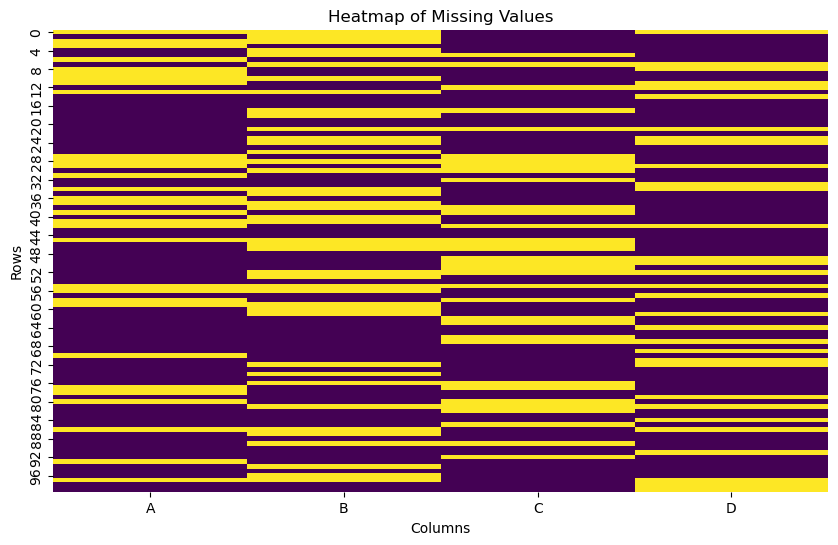

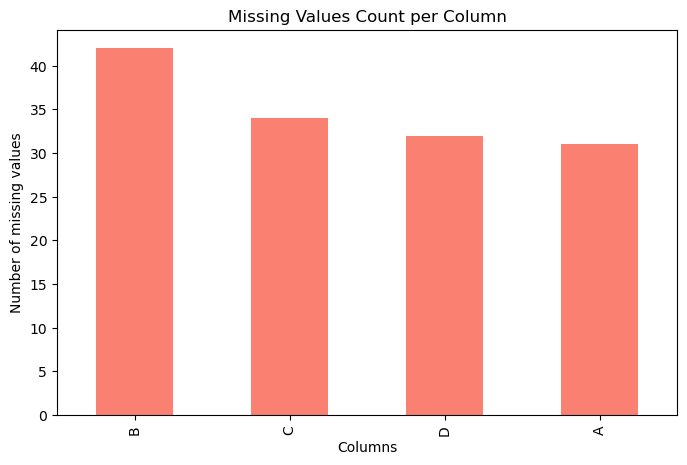

In [197]:
# show me some graphs to analyze NaN values

import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame with NaN values (replace this with your actual DataFrame)
# For demonstration, we're creating a DataFrame with some random missing values.
np.random.seed(42)
data = {
    'A': np.random.choice([1, 2, np.nan], size=100),
    'B': np.random.choice([3, 4, np.nan], size=100),
    'C': np.random.choice([5, 6, np.nan], size=100),
    'D': np.random.choice([7, 8, np.nan], size=100)
}
df = pd.DataFrame(data)

# -------------------------------
# Plot 1: Heatmap of Missing Values
# -------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

# -------------------------------
# Plot 2: Bar Chart of Missing Values per Column
# -------------------------------
missing_counts = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
missing_counts.plot(kind="bar", color='salmon')
plt.ylabel("Number of missing values")
plt.xlabel("Columns")
plt.title("Missing Values Count per Column")
plt.show()

In [198]:
all_props_df.fillna(0, inplace=True)


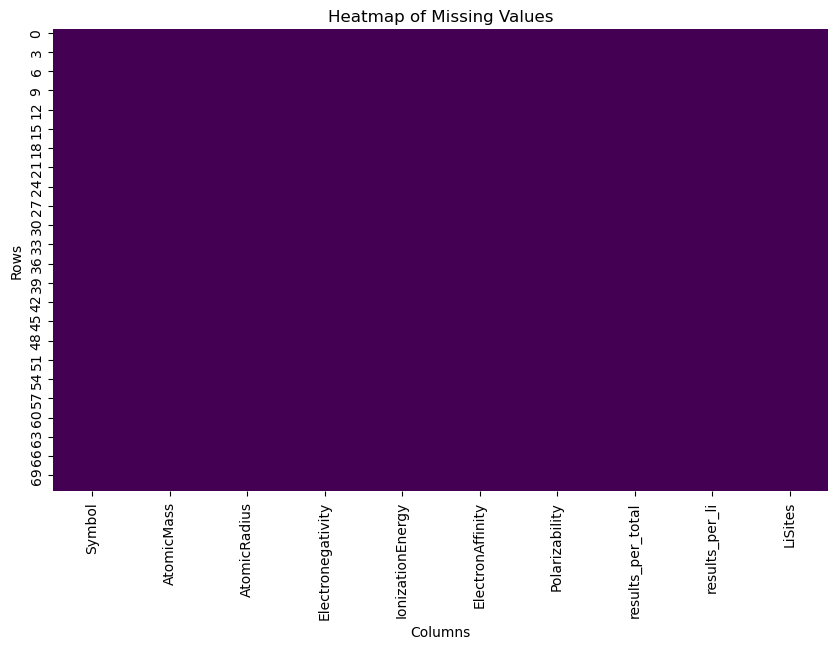

In [199]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_props_df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [200]:
all_props_df.to_csv('all_props.csv', index=False)
all_props_df = pd.read_csv('all_props.csv')

all_props_df

,Symbol,AtomicMass,AtomicRadius,Electronegativity,IonizationEnergy,ElectronAffinity,Polarizability,results_per_total,results_per_li,LiSites
0,Ge,72.630,211.0,2.01,7.900,1.350,40.0,0.001334,0.001334,6.0
1,Mg,24.305,173.0,1.31,7.646,0.000,71.2,0.016657,0.016657,3.0
2,B,10.810,192.0,2.04,8.298,0.277,20.5,0.001088,0.001088,2.0
3,Si,28.085,210.0,1.90,8.152,1.385,37.3,0.001198,0.001198,2.0
4,Cl,35.450,175.0,3.16,12.968,3.617,14.6,0.006963,0.006963,1.0
...,...,...,...,...,...,...,...,...,...,...
67,Sn,118.710,217.0,1.96,7.344,1.200,53.0,0.001640,0.001640,6.0
68,N,14.007,155.0,3.04,14.534,0.000,7.4,0.005725,0.005725,1.0
69,Ga,69.723,187.0,1.81,5.999,0.300,50.0,0.004338,0.004338,2.0
70,Br,79.900,183.0,2.96,11.814,3.365,21.0,0.006728,0.006728,1.0
